##### VL = Very low            (1 hotspot)
##### L = Low                      (2 hotspot)
##### M = Medium               (3 hotspot)
##### H = Hard                     (4 hotspot)
##### VH = Very Hard         (>=5 hotspot)
##### EH = Extreme Hard  (string hotspot)
##### 

# imports libs

In [58]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from os import path
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
def visualize(x,y):
    #z = TSNE(n_components=2).fit_transform(h)

    plt.figure(figsize=(10,10))
    #plt.xticks([])
    #plt.yticks([])

    #plt.scatter(x, y, s=5, c=color, cmap="Set2")
    plt.plot(x,y)
    #plt.legend()
    plt.show()

## lendo dados

In [77]:
df = pd.read_csv('hotspot.csv')

In [78]:
df.head()

,PPL,Isc,Voc,hotspot
0,1.154697,1.288825,0.425502,1
1,0.524784,1.467602,0.765602,1
2,0.730061,1.148001,0.584855,1
3,1.240413,1.456785,0.437555,1
4,0.593343,1.438941,0.500809,1


##### funções de pertinência para a redução da corrente em porcentos


In [4]:
ppl = ctrl.Antecedent(np.arange(0, 27, 0.01), 'PPL')
ppl

Antecedent: PPL

In [5]:
# Cria as funções de pertinência
ppl['VL'] = fuzz.trimf(ppl.universe, [0, 0.5, 1.4])
ppl['L'] = fuzz.trimf(ppl.universe, [1.1, 2.0, 2.9])
ppl['M'] = fuzz.trimf(ppl.universe, [1.5, 2.65, 3.8])
ppl['H'] = fuzz.trimf(ppl.universe, [2.5, 4.05, 5.6])
ppl['VH'] = fuzz.trimf(ppl.universe, [5.4 , 10.85, 16.3])
ppl['EH'] = fuzz.trimf(ppl.universe, [11.7, 19.0, 26.3])

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


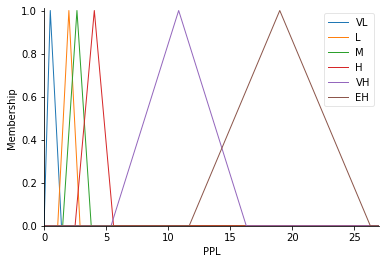

In [6]:
ppl.view()

##### funções de pertinência para a redução da corrente em porcentos

In [7]:
Isc = ctrl.Antecedent(np.arange(0, 6, 0.01), 'Isc')
Isc

Antecedent: Isc

In [8]:
Isc['VL'] = fuzz.trimf(Isc.universe, [0.7, 1.1, 1.5])
Isc['L'] = fuzz.trimf(Isc.universe, [0.95, 1.625, 2.3])
Isc['M'] = fuzz.trimf(Isc.universe, [1.3, 2.0, 2.7])
Isc['H'] = fuzz.trimf(Isc.universe, [1.33, 2.115, 2.9])
Isc['VH'] = fuzz.trimf(Isc.universe, [2.1 , 2.95, 3.8])
Isc['EH'] = fuzz.trimf(Isc.universe, [1.8, 3.1, 4.4])

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


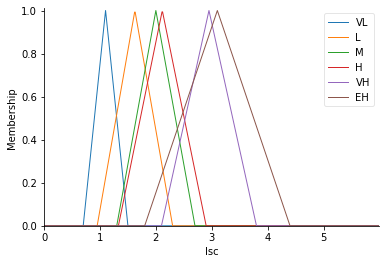

In [9]:
Isc.view()

##### funções de pertinência para a redução da tensão em porcentos

In [10]:
Voc = ctrl.Antecedent(np.arange(0, 6, 0.01), 'Voc')
Voc

Antecedent: Voc

In [11]:
Voc['VL'] = fuzz.trimf(Voc.universe, [0.3, 0.55, 0.8])
Voc['L'] = fuzz.trimf(Voc.universe, [0.65, 1.225, 1.8])
Voc['M'] = fuzz.trimf(Voc.universe, [1.4, 1.8, 2.2])
Voc['H'] = fuzz.trimf(Voc.universe, [1.7, 2.2, 2.7])
Voc['VH'] = fuzz.trimf(Voc.universe, [1.88 , 2.49, 3.1])
Voc['EH'] = fuzz.trimf(Voc.universe, [2.7, 3.8, 4.9])

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


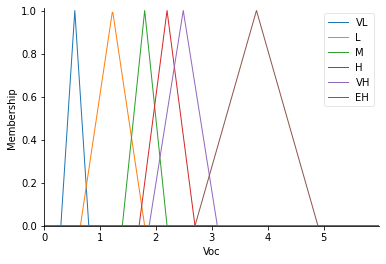

In [12]:
Voc.view()

##### pertinence function for output membership function (OMF) 

In [13]:
omf = ctrl.Consequent(np.arange(0, 1, 0.01), 'omf')
omf

Consequent: omf

In [14]:
omf['VL'] = fuzz.trimf(omf.universe, [0.0, 0.09, 0.18])
omf['L'] = fuzz.trimf(omf.universe, [0.16, 0.25, 0.34])
omf['M'] = fuzz.trimf(omf.universe, [0.32, 0.41, 0.498])
omf['H'] = fuzz.trimf(omf.universe, [0.48, 0.57, 0.655])
omf['VH'] = fuzz.trimf(omf.universe, [0.64, 0.73, 0.820])
omf['EH'] = fuzz.trimf(omf.universe, [0.8, 0.88, 0.88])

In [80]:
def saida(valor):
    if valor >=0 and valor<0.18:
        return 'VL', 1
    elif valor >=0.16 and valor<0.34:
        return 'L', 2
    elif valor >=0.32 and valor<0.498:
        return 'M', 3
    elif valor >=0.48 and valor<0.655:
        return 'H', 4
    elif valor >=0.64 and valor<0.82:
        return 'VH', 5
    elif valor >=0.8:
        return 'EH', 6

# rules of output

In [16]:
rule1 = ctrl.Rule(ppl['VL'] & Isc['L'] & Voc['L'], omf['VL'])
rule2 = ctrl.Rule(ppl['L'] & Isc['M'] & Voc['L'], omf['L'])
rule3 = ctrl.Rule(ppl['M'] & Isc['M'] & Voc['M'], omf['M'])
rule4 = ctrl.Rule(ppl['M'] & Isc['H'] & Voc['H'], omf['H'])
rule5 = ctrl.Rule(ppl['H'] & Isc['VH'] & Voc['H'], omf['VH'])
rule6 = ctrl.Rule(ppl['VH'] & Isc['VH'] & Voc['VH'], omf['EH'])

In [19]:
hot_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
hot_simulador = ctrl.ControlSystemSimulation(hot_ctrl)

In [83]:

df=df.drop(index=ind,axis=0)
df.head(5)

,PPL,Isc,Voc,hotspot
1,0.524784,1.467602,0.765602,1
6,1.068983,0.970235,0.746810,1
14,0.544547,0.945173,0.695334,1
15,0.716702,1.193191,0.712223,1
16,0.794258,1.398566,0.674201,1


In [87]:
saidas = list(df.hotspot)

In [93]:
x=0
y=0
z=0
h=0
datas = []
ind = []
predito = []

for i in df.values:
    try:
        hot_simulador.input['PPL'] = i[0]#15.3 #1.15#1.2
        hot_simulador.input['Isc'] = i[1]#3.5 #1.8#2.05
        hot_simulador.input['Voc'] = i[2]#3.0 #0.92#1.1

        # Computando o resultado
        hot_simulador.compute()
        #print(hot_simulador.output['omf'])
        predito.append(saida(hot_simulador.output['omf'])[1])
        if (saida(hot_simulador.output['omf'])[1] == i[3]):
            y+=1
            print(saida(hot_simulador.output['omf'])[1], i[3])
            datas.append(i)
        else:
            print(saida(hot_simulador.output['omf'])[1], i[3])
            z+=1
        
    except:
        x+=1
        ind.append(h)
        #prind.append(h)int(f"An exception occurred {i}")
    h+=1
x,y,z

1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
1 1.0
2 2.0
2 2.0
2 2.0
1 2.0
2 2.0
3 2.0
2 2.0
2 2.0
3 2.0
2 2.0
2 2.0
2 2.0
1 2.0
2 2.0
2 2.0
1 2.0
2 2.0
2 2.0
3 2.0
3 2.0
2 2.0
2 2.0
2 2.0
1 2.0
2 2.0
3 2.0
2 2.0
3 2.0
2 2.0
3 2.0
3 2.0
2 2.0
1 2.0
2 2.0
2 2.0
3 2.0
2 2.0
2 2.0
3 2.0
1 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
1 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
3 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
1 2.0
2 2.0
2 2.0
3 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
2 2.0
3 3.0
3 3.0
3 3.0
3 3.0
2 3.0
2 3.0
4 3.0
3 3.0
4 3.0
3 3.0
4 3.0
2 3.0
3 3.0
3 3.0
3 3.0
3 3.0
2 3.0
4 3.0
3 3.0
2 3.0
3 3.0
3 3.0
3 3.0
3 3.0
3 3.0
3 3.0
3 3.0
3 3.0
4 3.0
3 3.0
2 3.0
2 3.0
5 3.0
2 3.0
3 3.0
2 3.0
3 3.0
3 3.0
3 3.0
3 3.0
3 3.0
3 3.0
2 3.0
3 3.0
3 3.0
4 3.0
3 3.0
2 3.0
4 3.0
2 3.0
4 3.0
3 3.0
2 3.0
3 3.0
3 3.0
3 3.0
3 3.0
3 3.0
4 3.0
3 3.0
3 3.0
4 3.0
3 3.0
3 3.0
3 3.0
3 3.0
3 3.0
4 3.0
3 3.0
3 3.0
2 3.0
3 3.0
3 3.0
3 3.0
4 3.

(0, 165, 204)

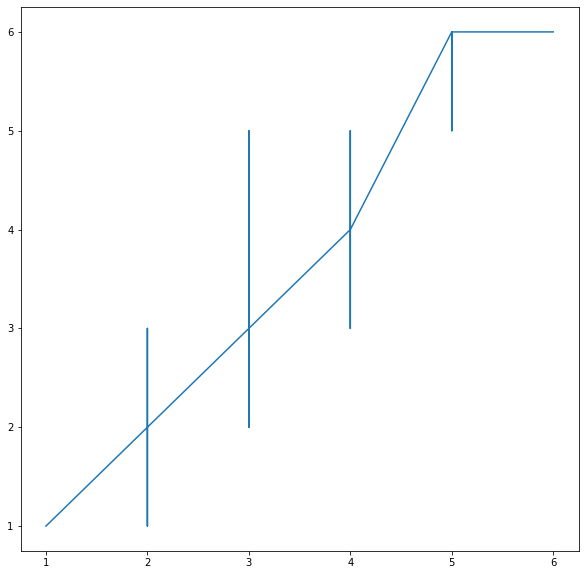

In [94]:
visualize(saidas, predito)

In [54]:
saida

1      1
6      1
14     1
15     1
16     1
      ..
506    6
527    6
541    6
547    6
593    6
Name: hotspot, Length: 369, dtype: int64

In [22]:
# Entrando com alguns valores para qualidade da comida e do serviço
hot_simulador.input['PPL'] = 15.3 #1.15#1.2
hot_simulador.input['Isc'] = 3.5 #1.8#2.05
hot_simulador.input['Voc'] = 3.0 #0.92#1.1


# Computando o resultado
hot_simulador.compute()
print(hot_simulador.output)


OrderedDict([('omf', 0.8477834699453553)])


/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


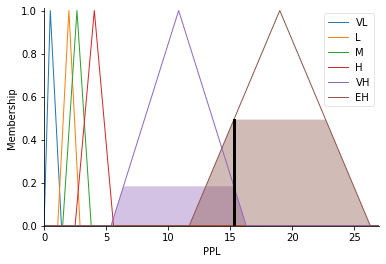

In [23]:
ppl.view(sim=hot_simulador)

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


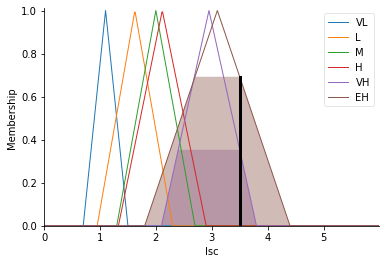

In [24]:
Isc.view(sim=hot_simulador)

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


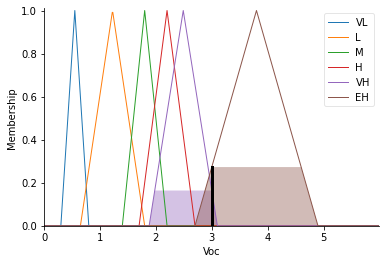

In [25]:
Voc.view(sim=hot_simulador)

/home/erik/Documentos/fuzzy/.env/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


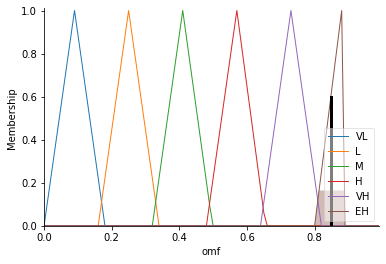

In [26]:
omf.view(sim=hot_simulador)